## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier 


---
## Step 0: Load The Data

In [11]:
# Load pickled data
import pickle
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.utils import shuffle
from tqdm import tqdm
import statistics

# np.set_printoptions(threshold=np.nan)

# TODO: Fill this in based on where you saved the training and testing data
def load_raw_data(dir):
    
    training_file = dir + '\\train.p'
    validation_file = dir + '\\valid.p'
    testing_file = dir + '\\test.p'

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    
    X_train, y_train = train['features'], train['labels']
    X_valid, y_valid = valid['features'], valid['labels']
    X_test, y_test = test['features'], test['labels']
    
    # Check the sanity of the data
    assert(len(X_train) == len(y_train))
    assert(len(X_valid) == len(y_valid))
    assert(len(X_test) == len(y_test))
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

# Load raw data

dir_current = os.getcwd()
dir_data = dir_current + '/traffic-signs-data'
X_train, y_train, X_valid, y_valid, X_test, y_test = load_raw_data(dir_data)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [12]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = np.array(X_train[0]).shape

# How many unique classes/labels there are in the dataset.
# n_classes = len(np.unique(y_train))
n_classes = len(np.bincount(y_train))


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

0.0116279069767
Training data bins:  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
Training data distribution:  [ 0.00517256  0.05689819  0.05776028  0.03620794  0.05086353  0.04741516
  0.01034512  0.03707003  0.03620794  0.03793212  0.05172562  0.03362166
  0.05431191  0.055174    0.01982816  0.01551769  0.01034512  0.02844909
  0.03103537  0.00517256  0.00862094  0.00775884  0.00948303  0.01293141
  0.00689675  0.03879422  0.01551769  0.00603466  0.0137935   0.00689675
  0.01120722  0.01982816  0.00603466  0.01721314  0.01034512  0.03103537
  0.00948303  0.00517256  0.05344981  0.00775884  0.00862094  0.00603466
  0.00603466]
Class to be augmented: [0, 6, 16, 19, 20, 21, 22, 24, 27, 29, 30, 32, 34, 36, 37, 39, 40, 41, 42]
Dataset Training contains 34799 samples


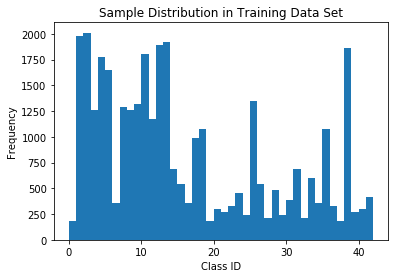

Dataset Validation contains 4410 samples


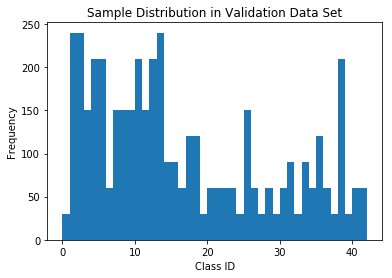

In [13]:
%matplotlib inline
'''
Visulization of raw data
'''
training_data_bins = np.bincount(y_train)
training_data_distribution = training_data_bins / len(y_train)

class_to_augment = []
mean_distribution = np.mean(training_data_distribution)/2
print(mean_distribution)
for i in range(len(training_data_distribution)):
    if training_data_distribution[i] < mean_distribution:
        class_to_augment.append(i)
      
    

print ('Training data bins: ',training_data_bins)
print ('Training data distribution: ',training_data_distribution)
print ('Class to be augmented:',class_to_augment)

def plot_rawdata_distributions(data, data_catogory=''):
    # Histogram of classes

    bins = np.unique(data)
    data_bins = np.bincount(data)
    data_bins_in_percent = data_bins / len(data) * 100
    
    print("Dataset {} contains {} samples".format(str(data_catogory), len(data)))
    
    plt.hist(data,bins=bins,label=data_catogory)
    plt.title('Sample Distribution in '+data_catogory+' Data Set')
    plt.xlabel('Class ID')
    plt.ylabel('Frequency')
    plt.show()



plot_rawdata_distributions(y_train,'Training')

plot_rawdata_distributions(y_valid,'Validation')


Index for first encounter of each class:  [  9960.   2220.  31439.   5370.   6810.  12360.  21450.  23730.  15870.
  11040.  17130.   8580.  27329.  21810.  29219.  29909.   5010.  30449.
  20370.   6630.  25950.  25680.   4500.   1770.  10800.  33449.   1230.
  10350.  26849.  10560.  25020.    210.  10140.  26250.  20010.  18930.
    900.   4830.  14010.  25410.   4200.      0.   9750.]


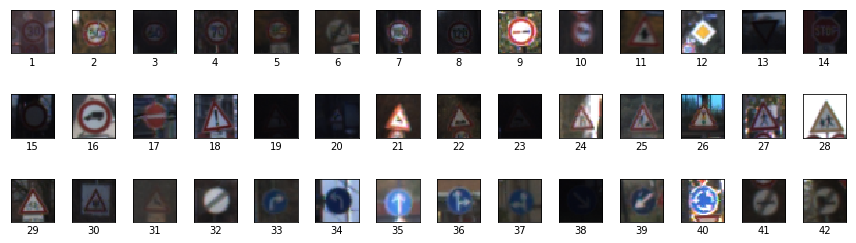

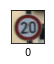

In [14]:
'''
Help functions to visulize images
'''
# Display image
def plot_image(image, nr, nc, i, label=""):
    if i>0: 
        plt.subplot(nr, nc, i)
    else:
        plt.figure(figsize=(nr,nc))
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(label)
    plt.tight_layout()
    plt.imshow(image, cmap="gray")

# Display a list of training images, one from each class
def plot_classes(X, y):
    """ 
    Create index array to keep track of which image has been encountered
    """
    index_count = np.zeros(n_classes)
    
    # Find the index of the class when it is first encountered
#     while i < n_classes:
    for i in range(n_classes):
        for j in range(len(y)):
            if y[j] == i:
                index_count[i] = int(j)
                break
        index = int(index_count[i])
        plot_image(X[index], 12, 14, i, label=str(i))
    plot_image(X[int(index_count[0])], 1, 1, 0, label=str(0))

    print('Index for first encounter of each class: ',index_count)
        
X_train, y_train, X_valid, y_valid, X_test, y_test = load_raw_data(dir_data)       
class_images = plot_classes(X_train, y_train)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [LeNet](https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb) is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful implementation. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [15]:
# Reload data for preprocessing
X_train_origin, y_train_origin, X_valid_origin, \
y_valid_origin, X_test_origin, y_test_origin = load_raw_data(dir_data)

X_train, y_train, X_valid, \
y_valid, X_test, y_test = \
X_train_origin, y_train_origin, X_valid_origin, \
    y_valid_origin, X_test_origin, y_test_origin

n_channels = 3 # Original data have 3 channels

# Turn into gray scale, channel reduced to 1
def rgb2gray(data):
    global n_channels
    n_channels = 1
    return np.dot(data[...,:3], [0.299, 0.587, 0.114]).reshape(len(data),32,32,1)

# Normalize data
def norm(data):
    a = 0
    b = 1.0
    return a+data*(b-a)/255

# Pipeline pre-processing data
def preprocessing(data, mode=''):
    if mode == 'gray':
        data = rgb2gray(data)
    data = norm(data)
    return data

print(X_train.shape)
print(X_train[1][1][1])

X_train = preprocessing(X_train,mode='gray')
X_valid = preprocessing(X_valid,mode='gray')
X_test = preprocessing(X_test,mode='gray')

print(X_train.shape)
print(X_train[1][1][1])
print(y_test_origin.shape)


(34799, 32, 32, 3)
[27 24 24]
(34799, 32, 32, 1)
[ 0.09763529]
(12630,)


### Visualize Sample Data

View a sample from the dataset.


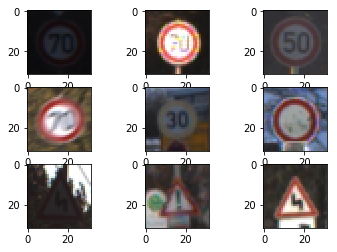

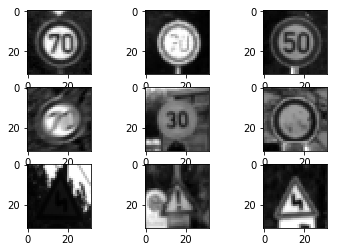

In [18]:
def plot_random(X_origin, X_train):
    random_index = np.random.randint(n_train, size=9)
    # Plot original image
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_origin[random_index[i]], cmap=plt.get_cmap('gray'))
    plt.show()
    
    # Plot gray image
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_train[random_index[i]].reshape(32,32), cmap="gray")
    plt.show()
    
plot_random(X_train_origin, X_train)  



### Augmenting Data with Keras

In [19]:
'''
Pipeline to augment image
'''
# Get images for a specific class
# Return [samples][pixels][width][height]
def images_for_specific_class(classID, X, y):
    images = []
    labels = []
    for i in range(n_train):
        if y[i] == classID:
            image = X[i].squeeze()
            images.append(image)
            labels.append(classID)
    images = np.array(images)
    images = images.astype('float32')
    images = np.reshape(images,(images.shape[0],1,32,32))
    labels = np.array(labels)
    return images, labels


# Using Keras image data generation engine
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_dim_ordering('th')

def augment_class(Images, labels, X, y, mode='Standardize'):
    # X_augment is in shape [samples][pixels][width][height]
    # Define data preparation
    # feature standardization
    if mode == 'Standardize':
        datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
        datagen.fit(Images)
    # rotation 
    elif mode == 'Rotate':
        rot_range = 20
        datagen = ImageDataGenerator(rotation_range=20)
        datagen.fit(Images)
    # ZCA whitening   
    elif mode == 'Whitening':
        datagen = ImageDataGenerator(zca_whitening=True)
        datagen.fit(Images)
    # Shift
    elif mode == 'Shift':
        shift = 0.2
        datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
        datagen.fit(Images)
    # Flip    
    elif mode == 'Flip':
        datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
        datagen.fit(Images)
    else:

        datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, \
                                     horizontal_flip=True, vertical_flip=True, \
                                    rotation_range=90, zca_whitening=True, \
                                    width_shift_range=0.2, height_shift_range=0.2)
        datagen.fit(Images)
        
    # datagen.flow has infinite loop
    for X_temp, y_temp in datagen.flow(Images, labels, batch_size=len(Images)):
        X_augmented = np.array(X_temp)
        y_augmented = np.array(y_temp)
        break

    X_augmented = np.reshape(X_augmented,(X_augmented.shape[0],32,32,1))
    
    X_new = []
    y_new = []
    for _X,_y in zip(X, y):
        X_new.append(_X)
        y_new.append(_y)
 
    for _XX,_yy in zip(X_augmented,y_augmented):
        X_new.append(_XX)
        y_new.append(_yy)

    return X_augmented, y_augmented, np.array(X_new), np.array(y_new)


Using TensorFlow backend.


Total number of images:  330
Class label:  22
Index to plot:  [279 254  65  65  58  91  55 221 146]


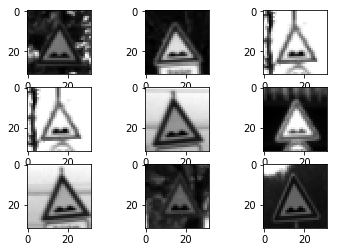

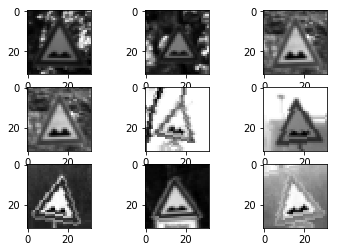

In [21]:
# let's visulize some augmented data
def plot_comparison_images(classID, X, y):
    images, labels = images_for_specific_class(classID,X,y)
    num_images = len(images)
    print ('Total number of images: ', num_images)
    print ('Class label: ', str(classID))
    
    # choose 9 random images to plot
    random_index = np.random.randint(num_images, size=9)
    print ('Index to plot: ', random_index)
    # Plot normal image
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(images[random_index[i]].reshape(32, 32), cmap=plt.get_cmap('gray'))
    plt.show()
    
#     # Plot whitened image
#     X_aug,y_aug,X_new,y_new = augment_class(images, labels, X_train, y_train, mode='Whitening')
#     for i in range(9):
#         plt.subplot(330 + 1 + i)
#         pyplot.imshow(X_aug[random_index[i]].reshape(32, 32), cmap=plt.get_cmap('gray'))
#     pyplot.show()
    
#     # Plot shifted image
#     X_aug,y_aug,X_new,y_new = augment_class(images, labels, X_train, y_train, mode='Shift')
#     for i in range(9):
#         plt.subplot(330 + 1 + i)
#         pyplot.imshow(X_aug[random_index[i]].reshape(32, 32), cmap=plt.get_cmap('gray'))
#     pyplot.show()
    
    # Plot flipped image
    X_aug,y_aug,X_new,y_new = augment_class(images, labels, X_train, y_train, mode='Rotate')
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_aug[random_index[i]].reshape(32, 32), cmap=plt.get_cmap('gray'))
    plt.show()
    
plot_comparison_images(22, X_train, y_train)

In [22]:
# Augment X_train, y_train
for class_to_aug in class_to_augment:
    size_ini = len(X_train)
    X_class, y_class = images_for_specific_class(int(class_to_aug), X_train, y_train)
    X_aug,y_aug,X_train,y_train = augment_class(X_class, y_class, X_train, y_train, mode='Rotate')

    size_end = len(X_train)
    print(size_end)
    diff = size_end - size_ini 
    print("Class {} is augmented with {} samples".format(str(class_to_aug), diff))
        
    

34979
Class 0 is augmented with 180 samples
35339
Class 6 is augmented with 360 samples
35699
Class 16 is augmented with 360 samples
35879
Class 19 is augmented with 180 samples
36179
Class 20 is augmented with 300 samples
36449
Class 21 is augmented with 270 samples
36779
Class 22 is augmented with 330 samples
37019
Class 24 is augmented with 240 samples
37229
Class 27 is augmented with 210 samples
37469
Class 29 is augmented with 240 samples
37859
Class 30 is augmented with 390 samples
38069
Class 32 is augmented with 210 samples
38429
Class 34 is augmented with 360 samples
38759
Class 36 is augmented with 330 samples
38939
Class 37 is augmented with 180 samples
39209
Class 39 is augmented with 270 samples
39509
Class 40 is augmented with 300 samples
39719
Class 41 is augmented with 210 samples
39929
Class 42 is augmented with 210 samples


Dataset Training contains 39929 samples


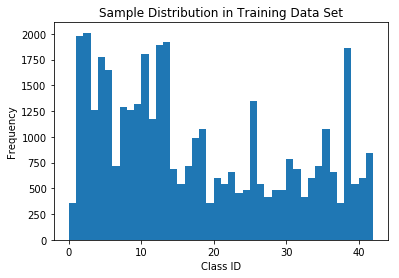

[ 360 1980 2010 1260 1770 1650  720 1290 1260 1320 1800 1170 1890 1920  690
  540  720  990 1080  360  600  540  660  450  480 1350  540  420  480  480
  780  690  420  599  720 1080  660  360 1860  540  600  420  420]
39929
[0, 19, 23, 24, 27, 28, 29, 32, 37, 41, 42]
40109
Class 0 is augmented with 180 samples
40289
Class 19 is augmented with 180 samples
40739
Class 23 is augmented with 450 samples
40979
Class 24 is augmented with 240 samples
41189
Class 27 is augmented with 210 samples
41669
Class 28 is augmented with 480 samples
41909
Class 29 is augmented with 240 samples
42119
Class 32 is augmented with 210 samples
42299
Class 37 is augmented with 180 samples
42509
Class 41 is augmented with 210 samples
42719
Class 42 is augmented with 210 samples


In [23]:
plot_rawdata_distributions(y_train,'Training')

# Do a second round of augmentation
new_bins = np.bincount(y_train)
print(new_bins)
print(len(y_train))
class_to_augment_2=[]
for i in range(len(new_bins)):
    if new_bins[i] < 500:
        class_to_augment_2.append(i)
print(class_to_augment_2)

# ROUND 2: Augment X_train, y_train
for class_to_aug in class_to_augment_2:
    size_ini = len(X_train)
    X_class, y_class = images_for_specific_class(int(class_to_aug), X_train, y_train)
    X_aug,y_aug,X_train,y_train = augment_class(X_class, y_class, X_train, y_train, mode='Shift')

    size_end = len(X_train)
    print(size_end)
    diff = size_end - size_ini 
    print("Class {} is augmented with {} samples".format(str(class_to_aug), diff))

Dataset Training contains 42719 samples


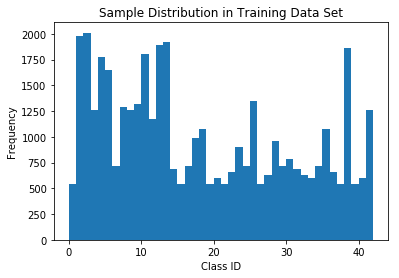

In [24]:
plot_rawdata_distributions(y_train,'Training')

### Model Architecture

#### Implement Layer Function

In [25]:
# Layer function
mu = 0
sigma = 0.1

def conv2d(x, nInput, nOutput, kFilter, s=1):
    W = tf.Variable(tf.truncated_normal([kFilter, kFilter, nInput, nOutput], mean=mu, stddev=sigma))
    b = tf.Variable(tf.truncated_normal([nOutput], mean=mu, stddev=sigma))
    x = tf.nn.conv2d(x, W, strides=[1,s,s,1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)
    
def maxpool2d(x, k=2, s=2):
    return tf.nn.max_pool(
        x,
        ksize=[1,k,k,1],
        strides=[1,s,s,1],
        padding='VALID')

def full_connect(x, nInput, nOutput, activation=False):
    W = tf.Variable(tf.truncated_normal([nInput, nOutput], mean=mu, stddev=sigma))
    b = tf.Variable(tf.truncated_normal([nOutput], mean=mu, stddev=sigma))
    fc = tf.add(tf.matmul(x, W), b)
    if activation:
        return tf.nn.relu(fc)
    return fc
    

#### Implement Function

In [34]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Convolution Layer 1: filter size 5x5, 32x32xn_channel => 28x28x12
    conv1 = conv2d(x, nInput=n_channels, nOutput=12, kFilter=5, s=1)
    print('Layer1 Conv:        ', conv1.get_shape())
    # Maxpool Layer 1: k = s = 2, 28x28x12 => 14x14x12
    pool1 = maxpool2d(conv1)
    print('Layer2 Maxpool:     ', pool1.get_shape())
    
    # Convolution Layer 2: filter size 5x5, 14x14x12 => 10x10x25
    conv2 = conv2d(pool1, nInput=12, nOutput=25, kFilter=5, s=1)
    print('Layer3 Conv:        ', conv2.get_shape())
    # Maxpool Layer 1: k = s = 2, 10x10x25 => 5x5x25
    pool2 = maxpool2d(conv2)
    print('Layer4 Maxpool:     ', pool2.get_shape())
    
    # Flatten Layer: 625
    flat = flatten(pool2)
    print('Layer5 Flatten:     ', flat.get_shape())
    
    # Fully Connected Layer 1: 625 => 120 
    fc1 = full_connect(flat, 625, 120, activation=True)
    print('Layer6 Fully Con:   ', fc1.get_shape())
    
    # Fully Connected Layer 2: 120 => 85 
    fc2 = full_connect(fc1, 120, 85, activation=True)
    print('Layer7 Fully Con:   ', fc2.get_shape())
    
    # Final Logits Layer: 85 => 43 
    logits = full_connect(fc2, 85, n_classes, activation=False)
    print('Layer8 Logits:      ', logits.get_shape())
    
    return logits


def LeNetWDropOut(x):    
    keep_prob = tf.constant(0.5)
    # Convolution Layer 1: filter size 5x5, 32x32xn_channel => 28x28x12
    conv1 = conv2d(x, nInput=n_channels, nOutput=12, kFilter=5, s=1)
    print('Layer1 Conv:        ', conv1.get_shape())
    # Maxpool Layer 1: k = s = 2, 28x28x12 => 14x14x12
    pool1 = maxpool2d(conv1)
    print('Layer2 Maxpool:     ', pool1.get_shape())
    
    # Convolution Layer 2: filter size 5x5, 14x14x12 => 10x10x25
    conv2 = conv2d(pool1, nInput=12, nOutput=25, kFilter=5, s=1)
    print('Layer3 Conv:        ', conv2.get_shape())
    # Maxpool Layer 1: k = s = 2, 10x10x25 => 5x5x25
    pool2 = maxpool2d(conv2)
    print('Layer4 Maxpool:     ', pool2.get_shape())
    
    # Flatten Layer: 625
    flat = flatten(pool2)
    print('Layer5 Flatten:     ', flat.get_shape())
    
    # Fully Connected Layer 1: 625 => 120 
    fc1 = full_connect(flat, 625, 120, activation=True)
    print('Layer6 Fully Con:   ', fc1.get_shape())
    
    # Dropout Layer 1:
    drop1 = tf.nn.dropout(fc1, keep_prob)
    print('Layer7 Dropout:     ', drop1.get_shape())
    
    # Fully Connected Layer 2: 120 => 85 
    fc2 = full_connect(drop1, 120, 85, activation=True)
    print('Layer8 Fully Con:   ', fc2.get_shape())
    
    # Final Logits Layer: 85 => 43 
    logits = full_connect(fc2, 85, n_classes, activation=False)
    print('Layer9 Logits:      ', logits.get_shape())
    
    return logits

def MyNet(x):    
    keep_prob = tf.constant(0.5)
    # Convolution Layer 1: filter size 5x5, 32x32xn_channel => 28x28x16
    conv1 = conv2d(x, nInput=n_channels, nOutput=16, kFilter=5, s=1)
    print('Layer1 Conv:        ', conv1.get_shape())
    # Maxpool Layer 1: k = s = 2, 28x28x12 => 14x14x16
    pool1 = maxpool2d(conv1)
    print('Layer2 Maxpool:     ', pool1.get_shape())
    
    # Convolution Layer 2: filter size 5x5, 14x14x16> 10x10x32
    conv2 = conv2d(pool1, nInput=16, nOutput=32, kFilter=5, s=1)
    print('Layer3 Conv:        ', conv2.get_shape())
    # Maxpool Layer 1: k = s = 2, 10x10x32 => 5x5x32
    pool2 = maxpool2d(conv2)
    print('Layer4 Maxpool:     ', pool2.get_shape())
    
    # Convolution Layer 3: filter size 3x3, 5x5x32 => 3x3x64
    conv3 = conv2d(pool2, nInput=32, nOutput=64, kFilter=3, s=1)
    print('Layer5 Conv:        ', conv3.get_shape())
    
    # Flatten Layer: 576
    flat = flatten(conv3)
    print('Layer6 Flatten:     ', flat.get_shape())
    
    # Fully Connected Layer 1: 576 => 300 
    fc1 = full_connect(flat, 576, 300, activation=True)
    print('Layer7 Fully Con:   ', fc1.get_shape())
    
    # Fully Connected Layer 2: 300 => 120 
    fc2 = full_connect(fc1, 300, 120, activation=True)
    print('Layer8 Fully Con:   ', fc1.get_shape())
    
    # Dropout Layer 1:
    drop1 = tf.nn.dropout(fc2, keep_prob)
    print('Layer9 Dropout:     ', drop1.get_shape())
    
    # Final Logits Layer: 120 => 43 
    logits = full_connect(drop1, 120, n_classes, activation=False)
    print('Layer10 Logits:      ', logits.get_shape())
    
    return logits

def MyNet2(x):    
    keep_prob = tf.constant(0.5)
    # Convolution Layer 1: filter size 5x5, 32x32xn_channel => 28x28x16
    conv1 = conv2d(x, nInput=n_channels, nOutput=16, kFilter=5, s=1)
    print('Layer1 Conv:        ', conv1.get_shape())
    # Maxpool Layer 1: k = s = 2, 28x28x12 => 14x14x16
    pool1 = maxpool2d(conv1)
    print('Layer2 Maxpool:     ', pool1.get_shape())
    
    # Convolution Layer 2: filter size 5x5, 14x14x16> 10x10x32
    conv2 = conv2d(pool1, nInput=16, nOutput=32, kFilter=5, s=1)
    print('Layer3 Conv:        ', conv2.get_shape())
    # Maxpool Layer 1: k = s = 2, 10x10x32 => 5x5x32
    pool2 = maxpool2d(conv2)
    print('Layer4 Maxpool:     ', pool2.get_shape())
    
    # Convolution Layer 3: filter size 3x3, 5x5x32 => 3x3x64
    conv3 = conv2d(pool2, nInput=32, nOutput=64, kFilter=3, s=1)
    print('Layer5 Conv:        ', conv3.get_shape())
    
    # Flatten Layer: 576
    flat = flatten(conv3)
    print('Layer6 Flatten:     ', flat.get_shape())
    
    # Fully Connected Layer 1: 576 => 300 
    fc1 = full_connect(flat, 576, 300, activation=True)
    print('Layer7 Fully Con:   ', fc1.get_shape())
    
    # Dropout Layer 1:
    drop1 = tf.nn.dropout(fc1, keep_prob)
    print('Layer8 Dropout:     ', drop1.get_shape())
    
    # Fully Connected Layer 2: 300 => 120 
    fc2 = full_connect(drop1, 300, 120, activation=True)
    print('Layer9 Fully Con:   ', fc2.get_shape())
    
    # Dropout Layer 2:
    drop2 = tf.nn.dropout(fc2, keep_prob)
    print('Layer10 Dropout:     ', drop2.get_shape())
    
    # Final Logits Layer: 120 => 43 
    logits = full_connect(drop2, 120, n_classes, activation=False)
    print('Layer11 Logits:      ', logits.get_shape())
    
    return logits

#### Setup placeholders for input images and output labels
`x` is a placeholder for a batch of input images.

`y` is a placeholder for a batch of output labels.

In [35]:
# Tensorflow training setup
EPOCHS = 2
BATCH_SIZE = 128
LEARNING_RATE = 0.0005
CALC_LOSS = True
CNN_NAME = 'MyNet2'

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = MyNet2(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

Layer1 Conv:         (?, 28, 28, 16)
Layer2 Maxpool:      (?, 14, 14, 16)
Layer3 Conv:         (?, 10, 10, 32)
Layer4 Maxpool:      (?, 5, 5, 32)
Layer5 Conv:         (?, 3, 3, 64)
Layer6 Flatten:      (?, 576)
Layer7 Fully Con:    (?, 300)
Layer8 Dropout:      (?, 300)
Layer9 Fully Con:    (?, 120)
Layer10 Dropout:      (?, 120)
Layer11 Logits:       (?, 43)


#### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [36]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate2(X_data, y_data):
    num_examples = len(X_data)
    print(num_examples)
    sess = tf.get_default_session()
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data})
    
    return accuracy

#### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [37]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
        testing_accuracy = evaluate(X_test, y_test)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Testing Accuracy = {:.3f}".format(testing_accuracy))
        print()
        
    saver.save(sess, "final/model.ckpt")
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.500
Training Accuracy = 0.484
Testing Accuracy = 0.486

EPOCH 2 ...
Validation Accuracy = 0.688
Training Accuracy = 0.687
Testing Accuracy = 0.680

Model saved


#### Test the Model
Calculate and report the accuracy on the training and validation set.

Once a final model architecture is selected, 
the accuracy on the test set should be calculated and reported as well.

In [38]:
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, "final/model.ckpt")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.679


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(5, 32, 32, 3)
(5,)


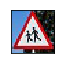

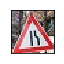

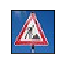

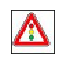

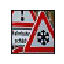

In [39]:
# dir_new_image = dir_current + '\\new_image'
image_names = os.listdir("new_image/")
new_images = []
new_y = np.array([28,24,25,26,30])

for name in image_names:
    image = mpimg.imread('new_image/'+name)
#     plt.imshow(image,cmap='gray')
    plot_image(image, 1, 3, 0)
    new_images.append(image)
new_images = np.array(new_images)    
print (new_images.shape)
print (new_y.shape)
# Pre process new images
new_images = preprocessing(new_images,mode='gray')

### Predict the Sign Type for Each Image

In [326]:
with tf.Session() as sess:
    saver.restore(sess, "/final/model.ckpt")
    probabilities = tf.nn.softmax(logits)
    new_prediction = sess.run(probabilities, feed_dict={x: new_images})
#     new_prediction = sess.run(logits, feed_dict={x: new_images})
    accuracy = evaluate2(new_images, new_y)

wrong_prediction = 0
for prediction, i in zip(new_prediction, range(len(new_prediction))):

    print ('Expected/Predicted Class: {}/{}'.format(new_y[i], np.argmax(prediction)))
    if np.argmax(prediction) != new_y[i]:
        wrong_prediction += 1
    
print("WRONG PREDICTION: ", wrong_prediction)

INFO:tensorflow:Restoring parameters from /final/model.ckpt
5
Expected/Predicted Class: 28/28
Expected/Predicted Class: 24/24
Expected/Predicted Class: 25/25
Expected/Predicted Class: 26/26
Expected/Predicted Class: 30/0
WRONG PREDICTION:  1


### Analyze Performance

In [327]:
print(accuracy)

0.6


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [328]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, "/final/model.ckpt")
    probabilities = tf.nn.softmax(logits)
    predictions = sess.run(probabilities, feed_dict={x: new_images})
    result = sess.run(tf.nn.top_k(tf.constant(predictions), k=5)) 
    
print(result[0])
print(result[1])

INFO:tensorflow:Restoring parameters from /final/model.ckpt
[[  1.00000000e+00   2.28463705e-13   9.86948560e-15   2.80297653e-22
    2.13063581e-22]
 [  1.00000000e+00   8.11930411e-14   1.99668558e-18   1.97586105e-21
    4.33782520e-22]
 [  9.99916792e-01   5.35718827e-05   2.07434769e-05   8.74784655e-06
    2.21273751e-07]
 [  9.99999404e-01   5.54945075e-07   8.24370073e-14   8.75906437e-15
    7.97274311e-18]
 [  4.16641772e-01   3.02177608e-01   1.29534483e-01   1.29163340e-01
    1.09224152e-02]]
[[28 24 27  0 20]
 [24 29 28 27 26]
 [25 29 28 22 24]
 [26 18 25  8 20]
 [28 37 27  0 23]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [319]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
outputFeatureMap(new_images,tf_activation,conv1)

NameError: name 'tf_activation' is not defined